In [2]:
# 📦 Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧪 Load Data
df = pd.read_csv("../data/processed/clash_royale_reviews_clean.csv", parse_dates=["at"])

# 👀 Intip Data
df.head()


,userName,score,content,length,at
0,Jatuh Dari5,3,"Parah mode baru (taktik fusi), masa penguranga...",416,2025-07-05 15:11:50
1,Dhika Boys,1,"Awal main cukup enjoy, tapi pas udah masuk lig...",459,2025-06-04 00:08:31
2,CORETAN SI TOPENG,5,terimakasih untuk update barunya mengenai vers...,217,2025-07-02 23:49:48
3,Hilmi Hidayat,1,"ga jelas dah ini game lama lama, kalo pay to w...",477,2025-07-07 10:05:03
4,PT All Markhheyswan,4,Permainan berjalan cukup Lancar dengan device ...,244,2025-07-05 19:17:21


/tmp/ipykernel_97099/2877873969.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="score", palette="viridis")


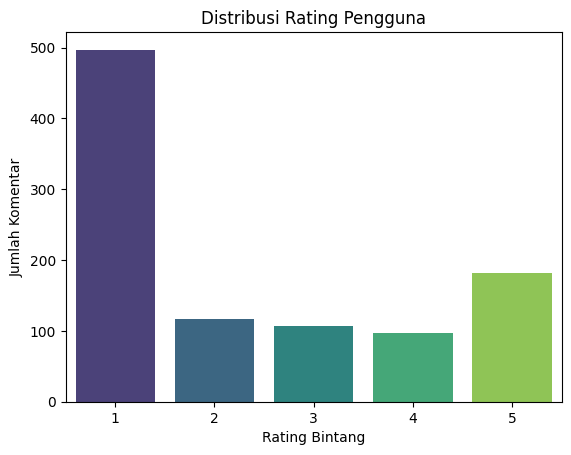

In [3]:
sns.countplot(data=df, x="score", palette="viridis")
plt.title("Distribusi Rating Pengguna")
plt.xlabel("Rating Bintang")
plt.ylabel("Jumlah Komentar")
plt.show()


/tmp/ipykernel_97099/3485476001.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="score", y="length", palette="Set2")


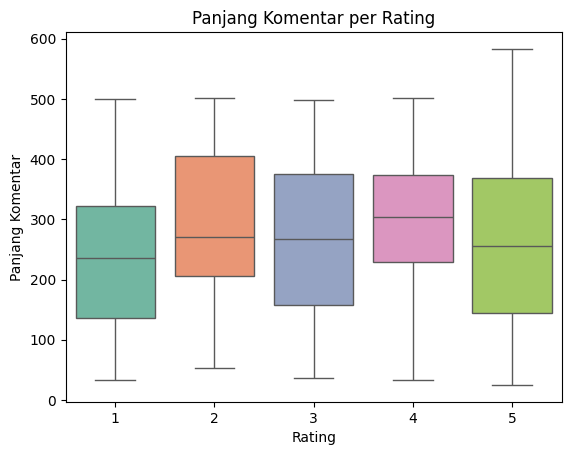

In [4]:
sns.boxplot(data=df, x="score", y="length", palette="Set2")
plt.title("Panjang Komentar per Rating")
plt.xlabel("Rating")
plt.ylabel("Panjang Komentar")
plt.show()


In [5]:
df.sort_values("at", ascending=False).head(5)[["at", "score", "content"]]


,at,score,content
956,2025-07-08 23:28:37,1,match making nya tidak seimbang tidak seperti ...
54,2025-07-07 22:24:10,1,"saya kasi bintang 1 karena game ini ga jelas, ..."
8,2025-07-07 21:37:30,1,"match macking gak adil bgt , masak iya ketemu ..."
25,2025-07-07 17:55:49,3,game nya bagus cuma jaringan nya tiba tiba suk...
52,2025-07-07 15:46:46,1,saya main kalah terus lawan ga imbang benteng ...


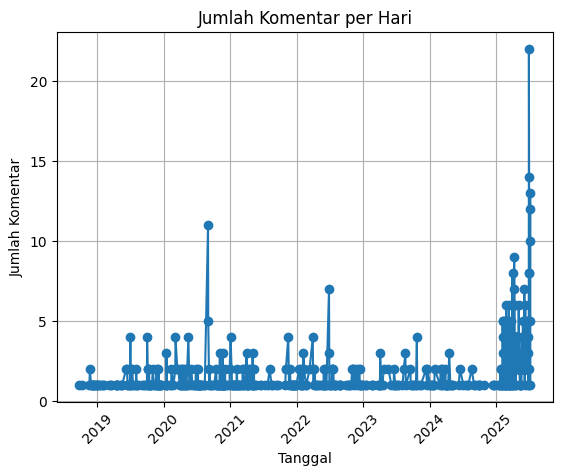

In [6]:
df["date"] = df["at"].dt.date
df["date"].value_counts().sort_index().plot(kind="line", marker='o')
plt.title("Jumlah Komentar per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Komentar")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [9]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

from sentiment_indobert import predict_sentiment

df["sentiment_bert"] = predict_sentiment(df["content"].tolist())
df["sentiment_bert"].value_counts()


/home/xerces/anaconda3/envs/play-insight/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


sentiment_bert
negative    793
positive    193
neutral      14
Name: count, dtype: int64

/tmp/ipykernel_97099/2591564105.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_bert", order=["positive","neutral","negative"], palette="Set2")


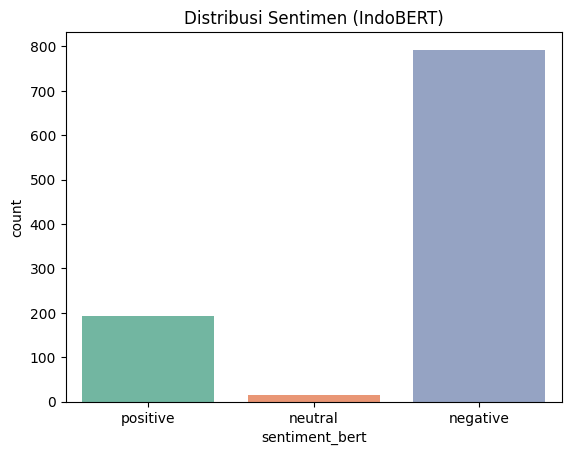

In [10]:
sns.countplot(data=df, x="sentiment_bert", order=["positive","neutral","negative"], palette="Set2")
plt.title("Distribusi Sentimen (IndoBERT)")
plt.show()


In [11]:
import sys, os
sys.path.append(os.path.abspath("../src"))
from wordcloud_utils import preprocess_text, generate_wordcloud


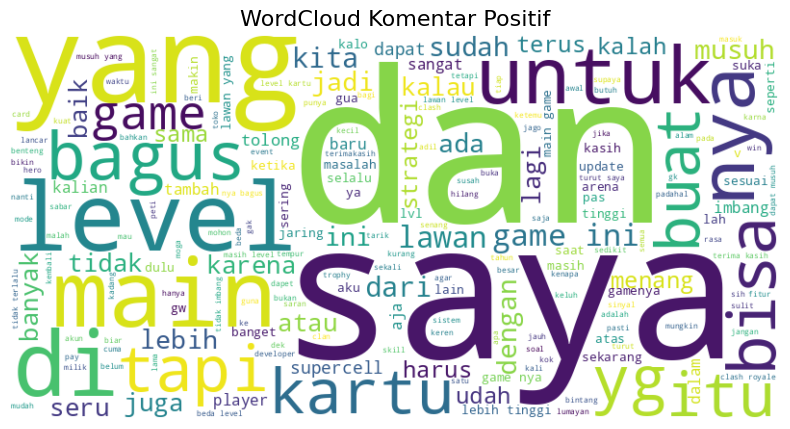

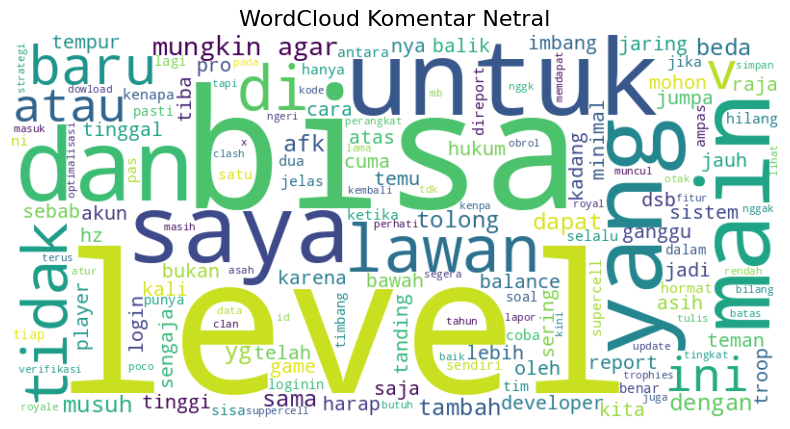

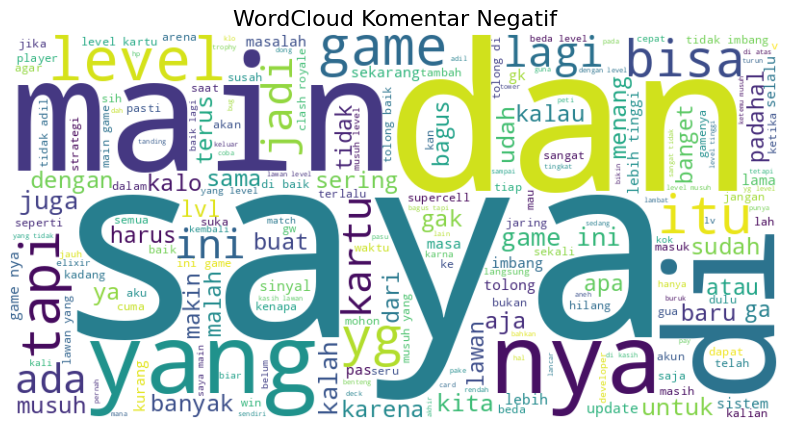

In [12]:
# Siapkan teks untuk tiap kategori sentimen
positif = " ".join(df[df["sentiment_bert"] == "positive"]["content"].dropna().astype(str).apply(preprocess_text))
netral  = " ".join(df[df["sentiment_bert"] == "neutral"]["content"].dropna().astype(str).apply(preprocess_text))
negatif = " ".join(df[df["sentiment_bert"] == "negative"]["content"].dropna().astype(str).apply(preprocess_text))

# WordCloud
generate_wordcloud(positif, "WordCloud Komentar Positif")
generate_wordcloud(netral, "WordCloud Komentar Netral")
generate_wordcloud(negatif, "WordCloud Komentar Negatif")


In [15]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA


In [16]:
docs = df["content"].dropna().astype(str).apply(preprocess_text).tolist()


In [17]:
topic_model = BERTopic(language="indonesian", verbose=True)
topics, probs = topic_model.fit_transform(docs)


2025-07-10 04:40:52,808 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 32/32 [00:00<00:00, 35.19it/s]
2025-07-10 04:42:26,831 - BERTopic - Embedding - Completed ✓
2025-07-10 04:42:26,832 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-10 04:42:33,625 - BERTopic - Dimensionality - Completed ✓
2025-07-10 04:42:33,627 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-10 04:42:33,656 - BERTopic - Cluster - Completed ✓
2025-07-10 04:42:33,659 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-10 04:42:33,699 - BERTopic - Representation - Completed ✓


In [18]:
# Lihat topik-topik utama
topic_model.get_topic_info().head(10)

# Tampilkan 5 kata utama dari topik-topik
topic_model.get_topic(0)  # topik 0

# Visualisasi interaktif
topic_model.visualize_topics()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'update | game | di | main | saya', 93],
                                   [1, 'kartu | level | saya | yang | tidak', 81],
                                   [2, 'supercell | dan | main | itu | baik', 47],
                                   [3, 'supercell | musuh | level | tolong | imbang', 35],
                                   [4, 'sinyal | bagus | tiba | sering | padahal', 32],
                                   [5, 'wifi | jaring | data | lag | padahal', 31],
                                   [6, 'musuh | level | kasih | kita | adil', 27],
                                   [7, 'clash | royale | saya | yang | di', 27],
                                   [8, 'akun | supercell | kode | ke | login', 24],
                                   [9, 'level | menang | tinggi | lawan | kalah', 23],
                                   [10, 'pay | win | to | ga | game', 22],
                                   [11, 'yang | dan | musuh | berat | bagus', 21],
                                   [12, 'musuh | saya | tambah | hancurin | di', 21],
                                   [13, 'bagus | game | chest | seru | santai', 19],
                                   [14, 'developer | level | lawan | untuk | saya', 18],
                                   [15, 'elixir | cepat | keluar | sama | lawan', 18],
                                   [16, 'level | kalian | lawan | jumpa | yg', 13],
                                   [17, 'game | lama | ini | selalu | buruk', 11],
                                   [18, 'game | ini | lawan | kalah | sportif', 11],
                                   [19, 'udah | gk | lvl | musuh | kalah', 11]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': {'bdata': 'XVEvIyAfGxsYFxYVFRMSEg0LCws=', 'dtype': 'i1'},
                         'sizemode': 'area',
                         'sizeref': 0.058125,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('rBsawN0fjUH1o0JAMoc+QC81lkH4D5' ... 'S/MYmMQWjJ9r//MQ7AubIEwFuHw0A='),
                    'dtype': 'f4'},
              'xaxis': 'x',
              'y': {'bdata': ('8lwdQXagikHX4JBBQ12QQZhTBEGlCA' ... 'pBJu6NQS+sKEFC9SFBRqcsQWu0QUA='),
                    'dtype': 'f4'},
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': np.float32(-3.2365627),
                                'y': np.float32(11.626881),
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': np.float32(9.1779),
                                'xshift': 10,
                                'y': np.float32(20.826252)}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(9.1779),
                           'x1': np.float32(9.1779),
                           'y0': np.float32(2.4275086),
                           'y1': np.float32(20.826252)},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': np.float32(-3.2365627),
                           'x1': np.float32(21.

In [22]:
df["topic"] = topics
print(topics)


[-1, -1, 0, 1, 0, 0, 17, -1, -1, 5, 1, 0, -1, -1, 10, -1, 4, -1, -1, 0, 0, -1, -1, 5, -1, 5, 15, -1, -1, -1, -1, -1, -1, -1, 4, -1, 2, 10, 14, -1, 1, -1, 13, -1, -1, 8, 1, 0, 15, -1, 0, -1, -1, 10, 1, 0, 0, 0, 1, -1, 0, -1, -1, 15, -1, 1, 3, 1, 8, -1, 4, -1, 1, -1, -1, 1, 7, 6, 9, 10, -1, 12, -1, 0, -1, -1, -1, -1, 0, -1, 0, 0, -1, 1, -1, 3, 13, -1, 15, 12, 0, 9, 0, -1, 2, -1, 0, 0, 18, 0, -1, -1, 0, -1, -1, 7, -1, 2, 17, -1, 1, -1, 0, 1, -1, 1, -1, 0, 5, 7, -1, 0, 17, 16, 6, -1, 6, 8, 2, 1, -1, -1, 7, 12, 5, 0, 8, -1, -1, 10, 4, 1, -1, 4, 5, 10, -1, -1, -1, -1, 1, 1, 10, 5, 1, 12, 17, -1, -1, 7, 1, -1, 1, -1, 14, 15, 3, -1, 5, -1, 13, -1, -1, -1, 4, -1, -1, 6, -1, 1, 9, 1, -1, 5, 8, -1, 18, 17, -1, -1, -1, 3, -1, -1, 0, -1, -1, -1, 1, -1, 5, 0, -1, 0, 4, 4, 1, 1, -1, 9, -1, -1, 1, -1, -1, 12, -1, -1, 18, 1, 11, 15, -1, 0, -1, -1, 2, 17, 1, 12, 8, 4, -1, 0, -1, -1, -1, 0, -1, 8, 5, -1, 6, -1, 4, -1, -1, 11, 2, -1, -1, 13, 17, 1, -1, 2, 8, 6, 4, -1, 6, -1, 10, 16, -1, -1, -1, 5, 2, 10, 

In [20]:
df[df["topic"] == 3][["content", "sentiment_bert"]].sample(5)


,content,sentiment_bert
355,Supercell tolong dong perbaiki lagi masalah 1v...,negative
563,Kapada pihak supercell untuk game nya sudah ba...,negative
792,"Adoooh, masa saya level 6 lawannya banyak bang...",negative
722,SUPERCELL Mohon mode wars/perang nya jangan te...,negative
416,"Kepada SuperCell, mohon untuk dipertimbangkan ...",positive


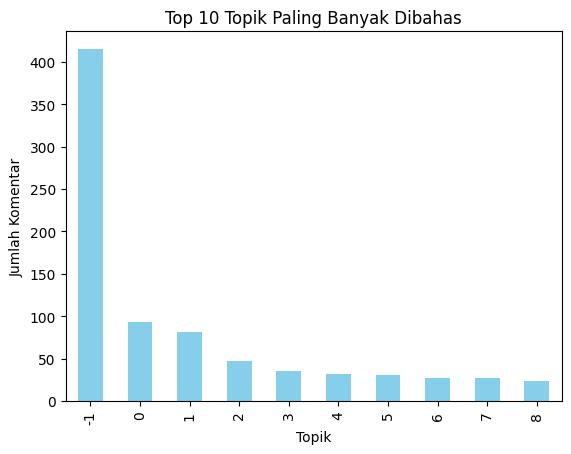

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

df["topic"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Topik Paling Banyak Dibahas")
plt.xlabel("Topik")
plt.ylabel("Jumlah Komentar")
plt.show()


In [31]:
from bertopic import BERTopic
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=1)
topic_model = BERTopic(hdbscan_model=hdbscan_model, language="indonesian")
topics, probs = topic_model.fit_transform(docs)


In [24]:
df = df[df["content"].str.len() > 10]  # Filter komen < 10 karakter


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="indonesian")
topic_model = BERTopic(vectorizer_model=vectorizer_model, language="indonesian")


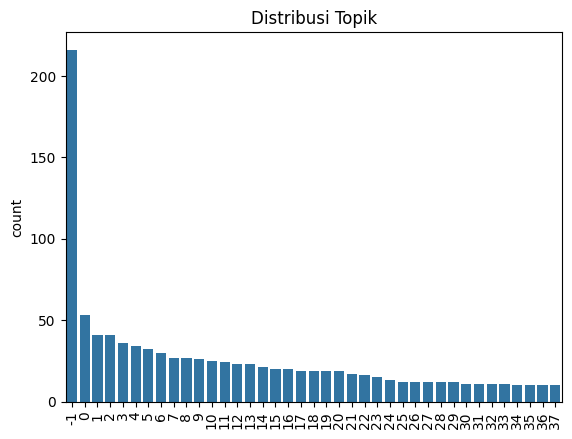

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=topics)
plt.xticks(rotation=90)
plt.title("Distribusi Topik")
plt.show()


In [27]:
df[["content", "topic", "sentiment_bert"]].head()


,content,topic,sentiment_bert
0,"Parah mode baru (taktik fusi), masa penguranga...",-1,negative
1,"Awal main cukup enjoy, tapi pas udah masuk lig...",-1,negative
2,terimakasih untuk update barunya mengenai vers...,0,positive
3,"ga jelas dah ini game lama lama, kalo pay to w...",1,negative
4,Permainan berjalan cukup Lancar dengan device ...,0,negative


In [28]:
import pandas as pd

# Hitung distribusi
topic_sentiment = df[df["topic"] != -1].groupby(["topic", "sentiment_bert"]).size().unstack().fillna(0)

# Tampilkan
topic_sentiment = topic_sentiment.astype(int)
topic_sentiment.head()


sentiment_bert,negative,neutral,positive
topic,,,
0,78,0,15
1,65,1,15
2,31,0,16
3,30,0,5
4,30,0,2


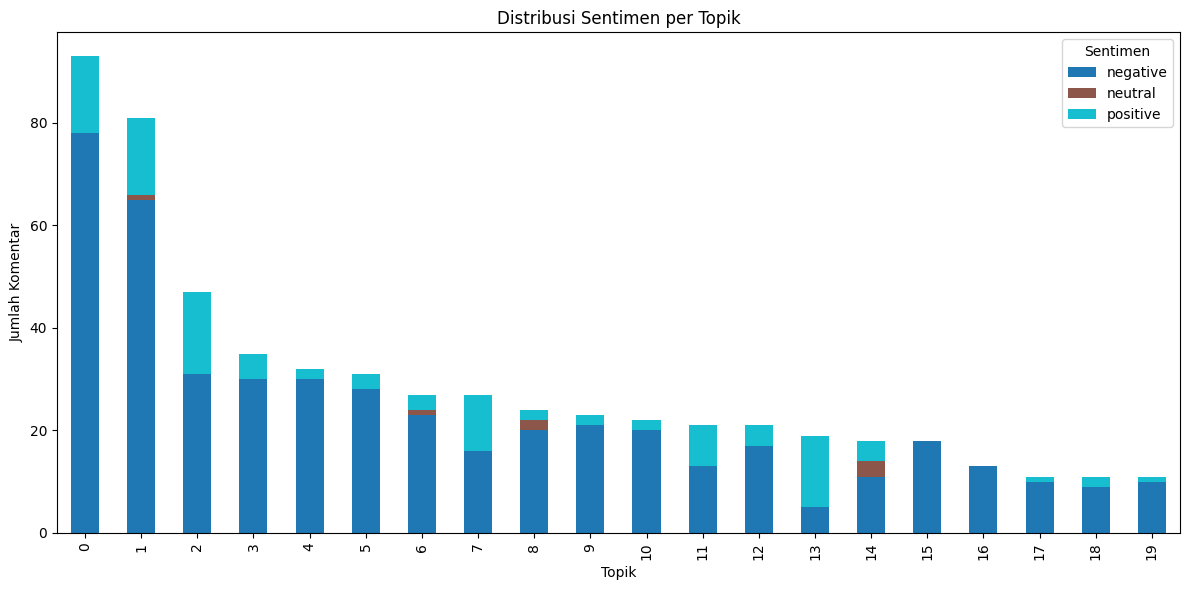

In [29]:
import matplotlib.pyplot as plt

topic_sentiment.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Distribusi Sentimen per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Komentar")
plt.legend(title="Sentimen")
plt.tight_layout()
plt.show()


In [32]:
topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,204,-1_saya_game_dan_level,"[saya, game, dan, level, yang, lawan, ini, itu...",[sebenernya sih game ini bagus cuma pilih lawa...
1,0,57,0_supercell_dan_main_mode,"[supercell, dan, main, mode, kita, nya, tolong...",[supercell tolong ikan beberapa fiture seperti...
2,1,39,1_supercell_musuh_level_tolong,"[supercell, musuh, level, tolong, imbang, saya...",[supercell tolong dong baik lagi masalah vs ny...
3,2,38,2_kartu_evolusi_card_to,"[kartu, evolusi, card, to, pay, yang, dan, mai...",[game yang sangat tidak harga usaha main kartu...
4,3,34,3_clash_royale_saya_yang,"[clash, royale, saya, yang, rasa, main, di, le...",[saya dulu pernah main game ini dan turut saya...
5,4,33,4_wifi_jaring_data_lag,"[wifi, jaring, data, lag, sering, padahal, pak...",[sudah main game ini tahun lebih sekarang kog ...
6,5,32,5_dan_yang_bagus_untuk,"[dan, yang, bagus, untuk, strategi, berat, mus...",[untuk sekarang sistem match dengan musuh tida...
7,6,32,6_sinyal_bagus_tiba_sering,"[sinyal, bagus, tiba, sering, lg, padahal, jar...",[buat game yang bener lah masa kalau main dapa...
8,7,31,7_level_tinggi_menang_lawan,"[level, tinggi, menang, lawan, kalah, ketemu, ...",[matchesing lawan gak jelas ketemu musuh yang ...
9,8,30,8_akun_login_ke_kode,"[akun, login, ke, kode, supercell, saya, hilan...",[sangat sayang ketika ingin login kembali ke a...


In [33]:
topic_model.get_topic(13)


[('saya', np.float64(0.047819499639918724)),
 ('level', np.float64(0.04314076000163529)),
 ('musuh', np.float64(0.038753521879934895)),
 ('yang', np.float64(0.028757555909238428)),
 ('tidak', np.float64(0.02663103765302535)),
 ('troops', np.float64(0.024528877285361253)),
 ('benteng', np.float64(0.021146648794266764)),
 ('mungkin', np.float64(0.020247907702937377)),
 ('imbang', np.float64(0.020030711775339095)),
 ('lebih', np.float64(0.019735982084038938))]

In [34]:
topic_labels = topic_model.get_topic_info()

for index, row in topic_labels.iterrows():
    print(f"Topik {row['Topic']}: {row['Name']}")


Topik -1: -1_saya_game_dan_level
Topik 0: 0_supercell_dan_main_mode
Topik 1: 1_supercell_musuh_level_tolong
Topik 2: 2_kartu_evolusi_card_to
Topik 3: 3_clash_royale_saya_yang
Topik 4: 4_wifi_jaring_data_lag
Topik 5: 5_dan_yang_bagus_untuk
Topik 6: 6_sinyal_bagus_tiba_sering
Topik 7: 7_level_tinggi_menang_lawan
Topik 8: 8_akun_login_ke_kode
Topik 9: 9_game_saat_update_sering
Topik 10: 10_pay_win_to_game
Topik 11: 11_sy_lambat_hampir_menang
Topik 12: 12_musuh_kita_selalu_level
Topik 13: 13_saya_level_musuh_yang
Topik 14: 14_lo_download_buka_peti
Topik 15: 15_game_ini_main_lawan
Topik 16: 16_elixir_cepat_keluar_cheater
Topik 17: 17_sistem_game_kita_ini
Topik 18: 18_developer_level_untuk_lawan
Topik 19: 19_chest_bagus_game_santai
Topik 20: 20_musuh_hancurin_enggak_tadi
Topik 21: 21_tiba_gw_di_bug
Topik 22: 22_cache_update_barter_makin
Topik 23: 23_ga_udah_lvl_musuh
Topik 24: 24_matchmaking_tidak_makin_kartu
Topik 25: 25_level_trophy_kalo_tropy
Topik 26: 26_king_kartu_tower_level
Topik 27: 

In [35]:
for topic in topic_labels["Topic"].unique():
    if topic != -1:
        keywords = ", ".join([word for word, _ in topic_model.get_topic(topic)[:5]])
        print(f"Topik {topic}: {keywords}")


Topik 0: supercell, dan, main, mode, kita
Topik 1: supercell, musuh, level, tolong, imbang
Topik 2: kartu, evolusi, card, to, pay
Topik 3: clash, royale, saya, yang, rasa
Topik 4: wifi, jaring, data, lag, sering
Topik 5: dan, yang, bagus, untuk, strategi
Topik 6: sinyal, bagus, tiba, sering, lg
Topik 7: level, tinggi, menang, lawan, kalah
Topik 8: akun, login, ke, kode, supercell
Topik 9: game, saat, update, sering, wifi
Topik 10: pay, win, to, game, ga
Topik 11: sy, lambat, hampir, menang, kalah
Topik 12: musuh, kita, selalu, level, berat
Topik 13: saya, level, musuh, yang, tidak
Topik 14: lo, download, buka, peti, nya
Topik 15: game, ini, main, lawan, kalah
Topik 16: elixir, cepat, keluar, cheater, sama
Topik 17: sistem, game, kita, ini, main
Topik 18: developer, level, untuk, lawan, saya
Topik 19: chest, bagus, game, santai, slot
Topik 20: musuh, hancurin, enggak, tadi, adalah
Topik 21: tiba, gw, di, bug, pass
Topik 22: cache, update, barter, makin, toko
Topik 23: ga, udah, lvl, mus

In [36]:
topic_labels = {
    0: "Supercell & Mode Game",
    1: "Level Tidak Seimbang",
    2: "Kartu Evolusi & Pay-to-Win",
    3: "Pengalaman Bermain",
    4: "Koneksi & Lag",
    5: "Strategi Bermain",
    6: "Gangguan Sinyal",
    7: "Level Musuh Ketinggian",
    8: "Masalah Akun",
    9: "Update & Koneksi",
    10: "Pay-to-Win",
    11: "Kekalahan Tipis",
    12: "Musuh Overpower",
    13: "Level Tidak Seimbang",
    14: "Masalah Peti",
    15: "Kekalahan Terus",
    16: "Cheater & Elixir",
    17: "Kritik Sistem",
    18: "Keluhan Developer",
    19: "Hadiah & Chest",
    20: "Menara Hancur",
    21: "Bug & Error",
    22: "Item & Toko",
    23: "Musuh Gak Masuk Akal",
    24: "Matchmaking Tidak Adil",
    25: "Trophy & Level",
    26: "Tower & Kartu",
    27: "Matchmaking Ketat",
    28: "Lawan Level Tinggi",
    29: "Game Tidak Bisa Dimainkan",
    30: "Fitur Baru",
    31: "Hero Kuat",
    32: "Kesabaran Dek",
    33: "Update Bug",
    34: "Developer Gak Adil",
    35: "Fairness & Lawan"
}

df["topic_label"] = df["topic"].map(topic_labels)


<Figure size 1200x800 with 0 Axes>

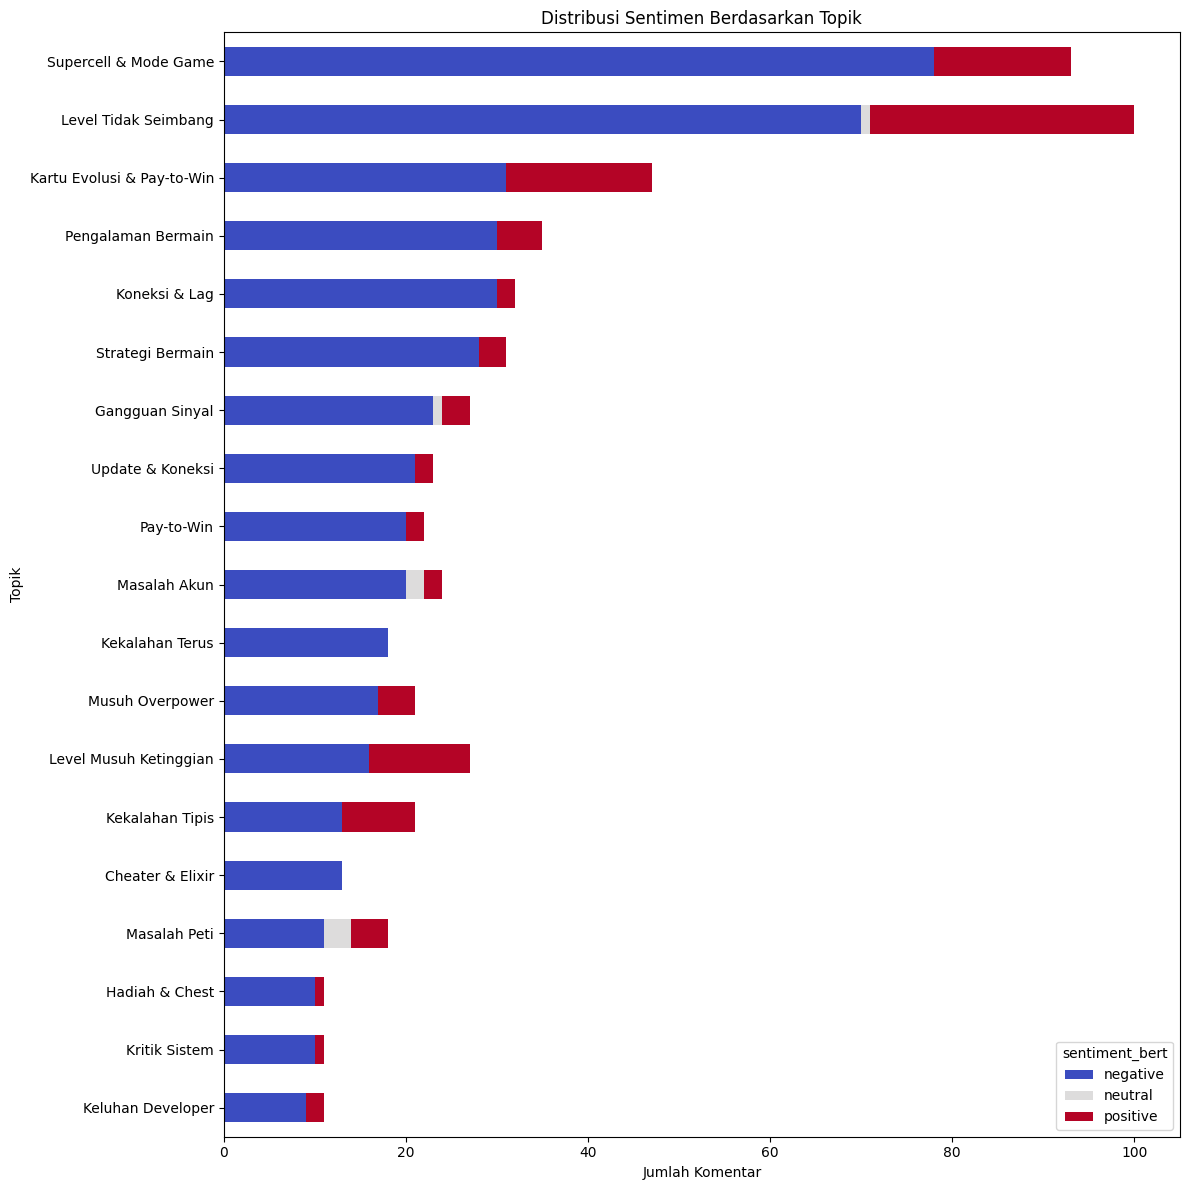

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hanya topik yang valid (bukan -1)
valid_df = df[df["topic"] != -1]

# Tabel pivot: jumlah komentar per (topik, sentimen)
summary = valid_df.pivot_table(index="topic_label", columns="sentiment_bert", aggfunc="size", fill_value=0)

# Urutkan berdasarkan jumlah komentar negatif
summary = summary.sort_values(by="negative", ascending=False)

# Plot
plt.figure(figsize=(12, 8))
summary[["negative", "neutral", "positive"]].plot(kind="barh", stacked=True, colormap="coolwarm", figsize=(12, 12))
plt.title("Distribusi Sentimen Berdasarkan Topik")
plt.xlabel("Jumlah Komentar")
plt.ylabel("Topik")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
